In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import np_utils
from keras import layers

In [67]:
(x_train_ori,y_train_ori),(x_test_ori,y_test_ori) = tf.keras.datasets.cifar10.load_data()

In [68]:
x_train_ori.shape

(50000, 32, 32, 3)

In [69]:
x_test_ori.shape

(10000, 32, 32, 3)

In [70]:
label_dictionary={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [71]:
x_train = x_train_ori / 255
x_test = x_test_ori / 255

In [72]:
y_train = np_utils.to_categorical(y_train_ori)
y_test = np_utils.to_categorical(y_test_ori)

In [73]:
print(y_test[:5])
y_test.shape

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


(10000, 10)

In [74]:
def plot_img_label_predict(img,label,predict,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  for i in range (0,num):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(img[idx],cmap='binary')
    title = str(i)+','+label_dictionary[label[idx][0]]
    if len(predict)>0:
      title+='==>'+label_dictionary[predict[idx]]

    ax.set_title(title,fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx+=1
  plt.show()


In [75]:
#model
model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(2500,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(10,activation='softmax'))


In [76]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_22 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 64)        0         
                                                      

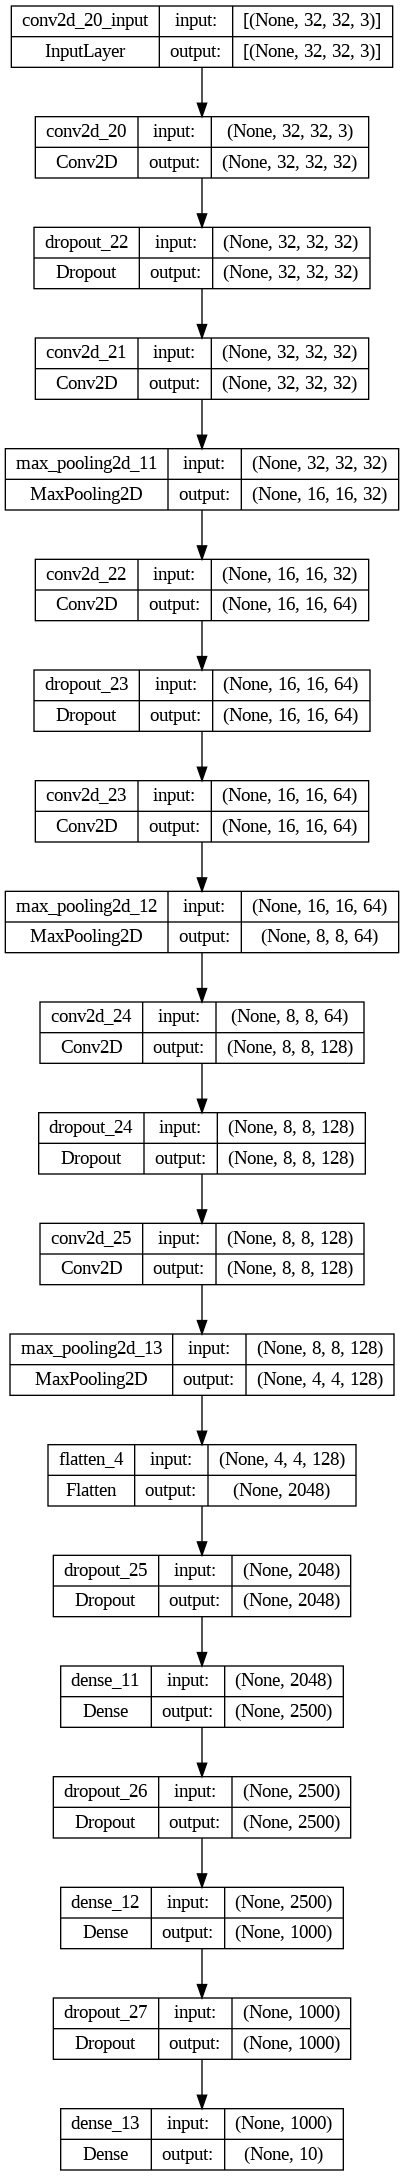

In [77]:
keras.utils.plot_model(model,show_shapes=True)

In [78]:
#train method
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

#start
history = model.fit(x=x_train, y=y_train, validation_split=0.2 ,batch_size=300, epochs=20, verbose=2)

Epoch 1/20
134/134 - 9s - loss: 1.9657 - accuracy: 0.2667 - val_loss: 1.9432 - val_accuracy: 0.2806 - 9s/epoch - 65ms/step
Epoch 2/20
134/134 - 5s - loss: 1.5358 - accuracy: 0.4341 - val_loss: 1.5456 - val_accuracy: 0.4417 - 5s/epoch - 36ms/step
Epoch 3/20
134/134 - 5s - loss: 1.3495 - accuracy: 0.5088 - val_loss: 1.3546 - val_accuracy: 0.5110 - 5s/epoch - 36ms/step
Epoch 4/20
134/134 - 5s - loss: 1.2019 - accuracy: 0.5656 - val_loss: 1.1286 - val_accuracy: 0.5862 - 5s/epoch - 37ms/step
Epoch 5/20
134/134 - 5s - loss: 1.0911 - accuracy: 0.6095 - val_loss: 1.0532 - val_accuracy: 0.6232 - 5s/epoch - 37ms/step
Epoch 6/20
134/134 - 5s - loss: 0.9942 - accuracy: 0.6432 - val_loss: 1.0728 - val_accuracy: 0.6185 - 5s/epoch - 37ms/step
Epoch 7/20
134/134 - 5s - loss: 0.9231 - accuracy: 0.6722 - val_loss: 0.9099 - val_accuracy: 0.6872 - 5s/epoch - 39ms/step
Epoch 8/20
134/134 - 6s - loss: 0.8485 - accuracy: 0.6979 - val_loss: 0.8257 - val_accuracy: 0.7072 - 6s/epoch - 42ms/step
Epoch 9/20
134/1

In [79]:
def show_train_history(history,train,validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

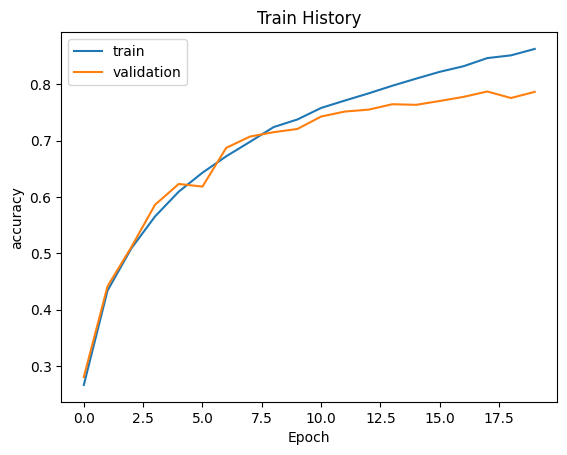

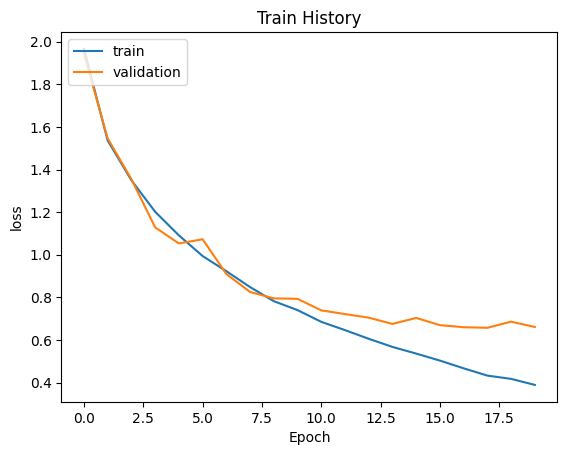

In [80]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [81]:
scores = model.evaluate(x_train, y_train, verbose=0)
print(scores[1])


0.9189199805259705


In [82]:
#predict
prediction = np.argmax(model.predict(x_test), axis=-1)
print(prediction)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 1 7]


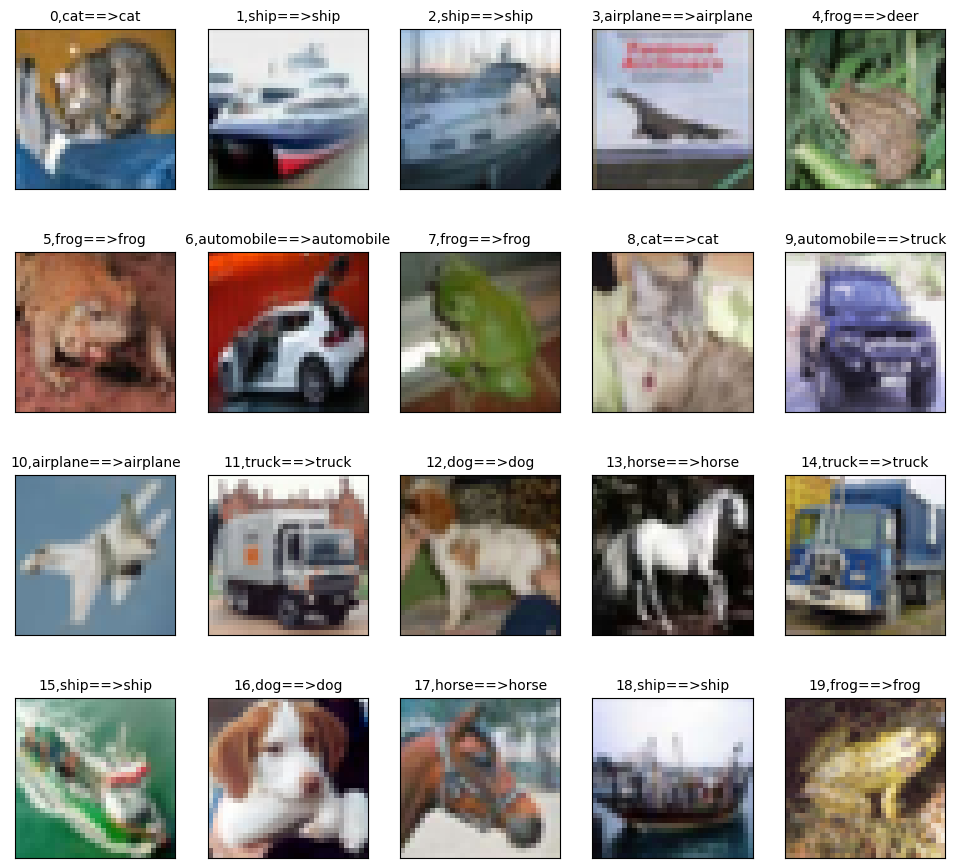

In [83]:
plot_img_label_predict(x_test_ori,y_test_ori,prediction,0,20)

In [84]:
#probability
predict_probability = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [91]:
def show_predict_probability(img,label,predict,probability,idx):
  print('label:',label_dictionary[label[idx][0]],'predict:',label_dictionary[prediction[idx]])
  plt.figure(figsize=[2,2])
  plt.imshow(np.reshape(img[idx],(32,32,3)))
  plt.show()
  for i in range (10):
    print(label_dictionary[i] + 'probability:%1.8f'%(predict_probability[idx][i]))

label: ship predict: ship


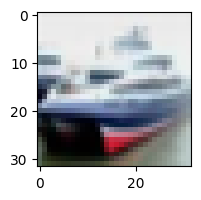

airplaneprobability:0.00252400
automobileprobability:0.00161793
birdprobability:0.00000000
catprobability:0.00000003
deerprobability:0.00000000
dogprobability:0.00000000
frogprobability:0.00000000
horseprobability:0.00000000
shipprobability:0.99581832
truckprobability:0.00003976


In [93]:
show_predict_probability(x_test_ori,y_test_ori,prediction,predict_probability,1)